In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("USArrests.csv")

# Understanding Dataset

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
data=data.drop('Unnamed: 0',axis=1) #'Unnamed: 0' column not needed as it provides no information

In [9]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


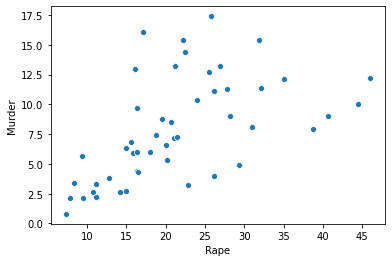

In [11]:
sns.scatterplot(x = 'Rape', y = "Murder", data = data)
plt.show()

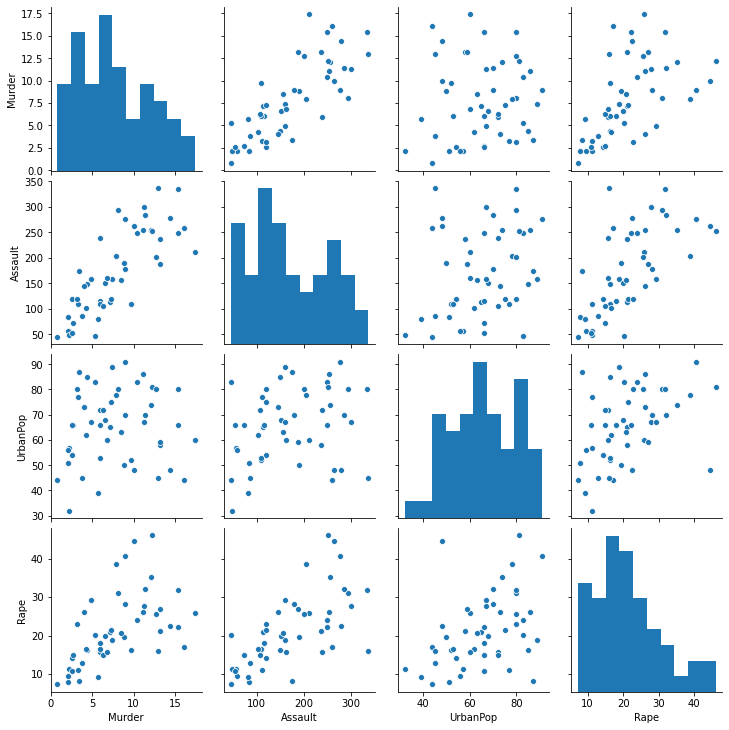

In [12]:
sns.pairplot(data[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [13]:
data.shape

(50, 4)

# KMeans Clustering

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(data)

KMeans(n_clusters=4)

In [15]:
clusters = km.predict(data)

In [16]:
clusters

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [17]:
pd.Series(clusters).value_counts() #gives no of pointes that belong to each cluster

1    16
3    14
2    10
0    10
dtype: int64

In [18]:
#adding cluster to dataset
data['clusters'] = clusters
data.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1


In [19]:
 km.inertia_ #wcss value for 4 clusters

34728.629357142854

In [20]:
#calculating wcss value 
all_wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(data)
    wcss = km.inertia_
    all_wcss.append(wcss)
all_wcss

[355868.14160000003,
 96459.09382594418,
 47984.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15463.473777777777,
 13329.361976190476,
 11125.03380952381,
 10384.143809523808]

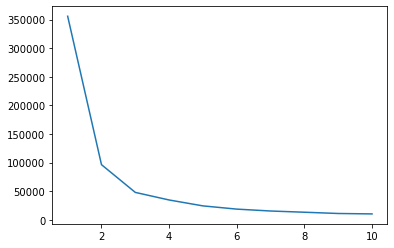

In [21]:
#Elbow method to find optimum no of cluster
plt.plot(range(1,11), all_wcss)
plt.show()

In [22]:
# 3 is taken as the optimum no of cluster
km = KMeans(n_clusters=3)
km.fit(data)
clusters = km.predict(data)

In [23]:
data['clusters'] = clusters

In [24]:
data.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


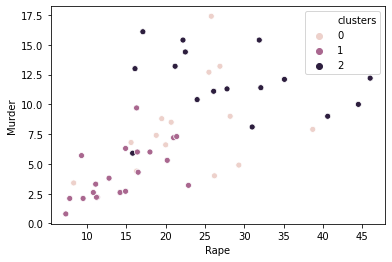

In [25]:
sns.scatterplot(x = 'Rape', y = "Murder", data = data, hue = "clusters")
plt.show()

# HC clustering

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [27]:
mergings = linkage(data, method = "complete")

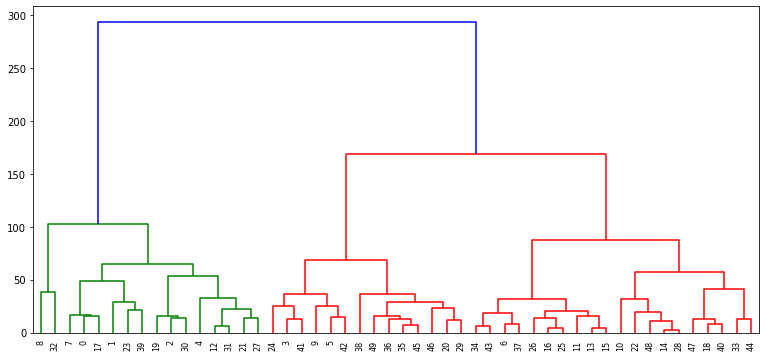

In [28]:
plt.figure(figsize=(13,6))
dendrogram(mergings)
plt.show()

In [29]:
labels = fcluster(mergings, 130, criterion='distance')
labels


array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [30]:
data['hc_clusters'] = labels
data

,Murder,Assault,UrbanPop,Rape,clusters,hc_clusters
0,13.2,236,58,21.2,2,1
1,10.0,263,48,44.5,2,1
2,8.1,294,80,31.0,2,1
3,8.8,190,50,19.5,0,2
4,9.0,276,91,40.6,2,1
5,7.9,204,78,38.7,0,2
6,3.3,110,77,11.1,1,3
7,5.9,238,72,15.8,2,1
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,2
